In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_train = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")

In [3]:
df_train.head(2)

,data1,data2,data3,data4,data5,data6,data7,data8,data9,data10,output
0,8,279,C,14.451155,1139.0,1.0,9.302908,1.0,M,p,86.108947
1,1,108,H,14.207448,1656.0,1.0,7.220130,0.0,M,p,42.606833


In [4]:
df_test.head(2)

,data1,data2,data3,data4,data5,data6,data7,data8,data9,data10
0,7,195,A,29.038043,2725,1,6.145731,2,M,p
1,9,109,F,20.221431,1184,1,9.334184,2,M,p


In [5]:
# Checking for NaN values in Train and Test Datasets..

df_train.isnull().sum()

data1     0
data2     0
data3     0
data4     0
data5     1
data6     3
data7     2
data8     1
data9     1
data10    1
output    1
dtype: int64

In [6]:
df_test.isnull().sum()

data1     0
data2     0
data3     0
data4     0
data5     0
data6     0
data7     0
data8     0
data9     0
data10    0
dtype: int64

In [7]:
# Deleting the NaN values from Train Dataset..

df_train.dropna(axis = 0, inplace= True)
df_test.dropna(axis = 0, inplace= True)

In [8]:
df_train.isnull().sum().sum()

0

In [9]:
df_test.isnull().sum().sum()

0

In [10]:
# Converting Categorical Data into Numerical Data with get_dummies option, to plot heatmap for the correlation..

# For the Training Dataset

df_train["data10"] = pd.get_dummies(df_train["data10"])
df_train["data9"] = pd.get_dummies(df_train["data9"])

# For the Testing Dataset

df_test["data10"] = pd.get_dummies(df_train["data10"])
df_test["data9"] = pd.get_dummies(df_train["data9"])


In [11]:
# Converting Categorical Data into Numerical Data with LabelEncoding method, to plot heatmap for the correlation..

from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

df_train["data3"] = label_encoder.fit_transform(df_train["data3"])
df_test["data3"] = label_encoder.fit_transform(df_test["data3"])

In [12]:
print(df_train.head(2))
print(df_test.head(2))

   data1  data2  data3      data4   data5  data6     data7  data8  data9  \
0      8    279      2  14.451155  1139.0    1.0  9.302908    1.0      0   
1      1    108      7  14.207448  1656.0    1.0  7.220130    0.0      0   

   data10     output  
0       1  86.108947  
1       1  42.606833  
   data1  data2  data3      data4  data5  data6     data7  data8  data9  \
0      7    195      0  29.038043   2725      1  6.145731      2    1.0   
1      9    109      5  20.221431   1184      1  9.334184      2    1.0   

   data10  
0     1.0  
1     1.0  


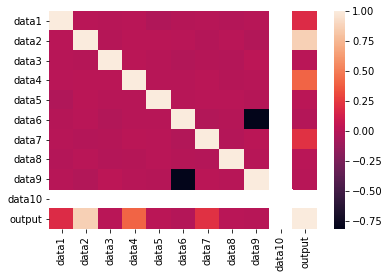

In [13]:
# Generating HeatMap to check the correlation between the columns..

corr_val = df_train.corr()
sns.heatmap(corr_val)

In [14]:
# Removing data10 column as it has no relation with any data..

print(df_train.drop("data10", axis = 1))
print(df_test.drop("data10", axis = 1))

      data1  data2  data3      data4   data5  data6     data7  data8  data9  \
0         8    279      2  14.451155  1139.0    1.0  9.302908    1.0      0   
1         1    108      7  14.207448  1656.0    1.0  7.220130    0.0      0   
2         8    258      0  19.220830  2817.0    1.0  8.727214    1.0      0   
3         4    147      0  15.752732  1948.0    1.0  6.078818    1.0      0   
4         5    230      7  10.195407  1336.0    1.0  4.749185    0.0      0   
...     ...    ...    ...        ...     ...    ...       ...    ...    ...   
9995      9    263      0  16.604215  1070.0    0.0  8.979149    2.0      1   
9996      5    280      4  28.758911  2652.0    0.0  3.574129    0.0      1   
9997      6    188      3  15.963267  1359.0    0.0  2.880019    0.0      1   
9998      1    132      7  11.683401  1793.0    0.0  6.983192    2.0      1   
9999      5    264      0  21.176115  1792.0    0.0  8.276101    2.0      1   

         output  
0     86.108947  
1     42.606833

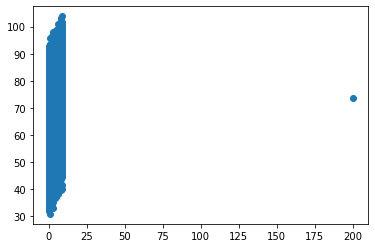

In [15]:
# Plotting Scatter Plots between data1 and output due to the presence of an outlier..

plt.scatter(df_train["data1"], df_train["output"])

In [16]:
val = df_train.loc[df_train["data1"] > 75].index
print(val)
df_train.drop(val, inplace= True)

Int64Index([18], dtype='int64')


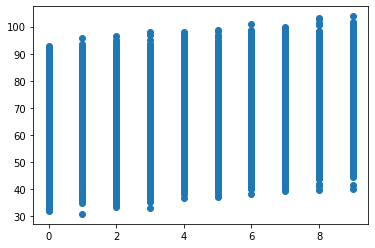

In [17]:
# Plotting a Scatter Plot between Data1 and output to check if the outlier is still present.

plt.scatter(df_train["data1"], df_train["output"])

In [18]:
df_train.head()

,data1,data2,data3,data4,data5,data6,data7,data8,data9,data10,output
0,8,279,2,14.451155,1139.0,1.0,9.302908,1.0,0,1,86.108947
1,1,108,7,14.207448,1656.0,1.0,7.220130,0.0,0,1,42.606833
2,8,258,0,19.220830,2817.0,1.0,8.727214,1.0,0,1,85.625961
3,4,147,0,15.752732,1948.0,1.0,6.078818,1.0,0,1,53.656277
4,5,230,7,10.195407,1336.0,1.0,4.749185,0.0,0,1,64.925051


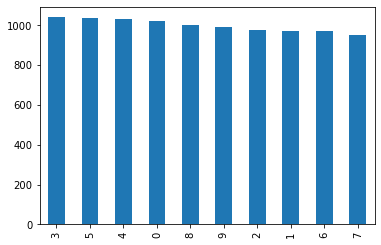

In [23]:
# Plotting a graph for value Counts for data1 value..
    
_ = df_train["data1"].value_counts().plot(kind = "bar")
plt.show()

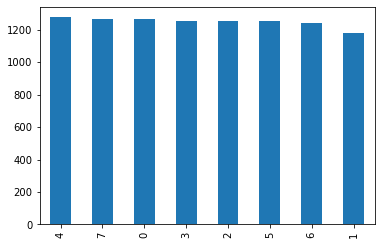

In [25]:
# Plotting graph for value counts for data3

_ = df_train["data3"].value_counts().plot(kind = "bar")
plt.show()

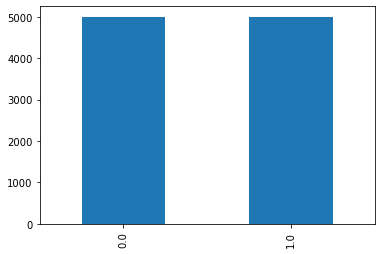

In [26]:
_ = df_train["data6"].value_counts().plot(kind = "bar")
plt.show()

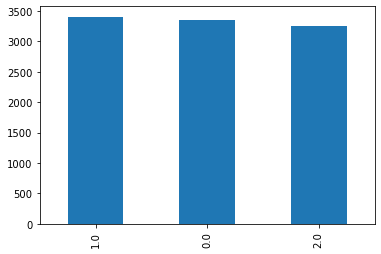

In [28]:
_ = df_train["data8"].value_counts().plot(kind = "bar")
plt.show()

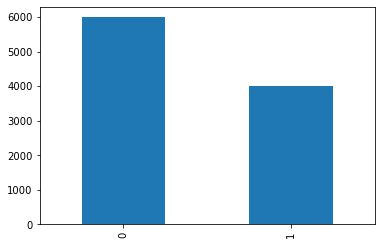

In [29]:
_ = df_train["data9"].value_counts().plot(kind = "bar")
plt.show()

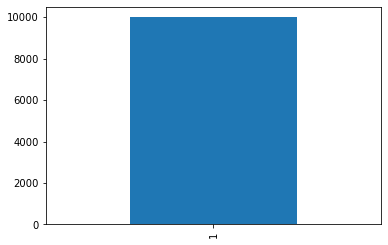

In [30]:
_ = df_train["data10"].value_counts().plot(kind = "bar")
plt.show()

In [31]:
df_train.head(2)

,data1,data2,data3,data4,data5,data6,data7,data8,data9,data10,output
0,8,279,2,14.451155,1139.0,1.0,9.302908,1.0,0,1,86.108947
1,1,108,7,14.207448,1656.0,1.0,7.220130,0.0,0,1,42.606833


In [32]:
df_train.isnull().sum().sum()

0

In [33]:
X = df_train.drop("output", axis = 1)

In [34]:
y = df_train["output"]

In [35]:
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit_transform(X)

In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 20)

In [37]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(7497, 10) (2499, 10) (7497,) (2499,)


In [38]:
from sklearn.neighbors import KNeighborsClassifier
knnmodel = KNeighborsClassifier(n_neighbors = 5)
knnmodel.fit(X_train, y_train)
y_predict = knnmodel.predict(X_test)

ValueError: Unknown label type: 'continuous'

In [41]:
from sklearn.linear_model import LinearRegression
lin_reg_model = LinearRegression().fit(X_train, y_train)

In [42]:
y_pred = lin_reg_model.predict(X_test)

In [50]:
comparison_lin_reg = pd.DataFrame({
    "Actual" : y_test,
    "Predicted" : y_pred
})

In [51]:
comparison_lin_reg

,Actual,Predicted
8234,84.615439,84.615815
6173,51.465391,51.490699
5433,67.877814,67.823922
2783,60.814059,60.877296
1057,67.902347,67.848352
...,...,...
8639,62.798327,62.740841
7599,74.558002,74.567917
6284,47.230311,47.216634
6567,37.020113,37.107749


In [46]:
from sklearn.metrics import r2_score
Score = r2_score(y_test, y_pred)
Score

0.9991154700105466

In [49]:
from sklearn.neighbors import KNeighborsRegressor
kn_reg = KNeighborsRegressor(n_neighbors = 9).fit(X_train, y_train)
kn_y_pred = kn_reg.predict(X_test)

In [52]:
comparison_kn_reg = pd.DataFrame({
    "Actual" : y_test,
    "Predicted" : kn_y_pred
})

In [53]:
comparison_kn_reg

,Actual,Predicted
8234,84.615439,84.502779
6173,51.465391,51.057682
5433,67.877814,70.580643
2783,60.814059,63.106334
1057,67.902347,68.687102
...,...,...
8639,62.798327,62.948165
7599,74.558002,71.149802
6284,47.230311,51.271492
6567,37.020113,46.813945


In [56]:
Score_knreg = r2_score(y_test, kn_y_pred)
Score_knreg

0.9468300148828677